    Divide any number in the sequence by the previous number; the ratio is always approximately 1.618.
    divide any number in the sequence by the next number; the ratio is always approximately 0.618.
    The square root of 0.618 is 0.786 (78.6%).
    there is consistency when any number in the sequence is divided by a number three places right to it.
    The ratios 23.6%, 38.2%, 61.8%, and 78.6% are known as the Fibonacci ratios.

In [1]:
import processing
import ds
import ml
import model_saving
import TS

Using TensorFlow backend.


In [4]:
import os
import sys
import numpy as np
import pandas as pd
#import talib

In [29]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [30]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km
#data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [31]:
price_min=data.Close.min()

In [32]:
price_max=data.Close.max()

In [33]:
diff=price_max-price_min
level1=price_max-0.236*diff
level2=price_max-0.382*diff
level3=price_max-0.618*diff

In [34]:
print('Level','Price')
print('0',price_max)
print('1',level1)
print('2',level2)
print('3',level3)

Level Price
0 267.865
1 267.371751099
2 267.066611633
3 266.573372498


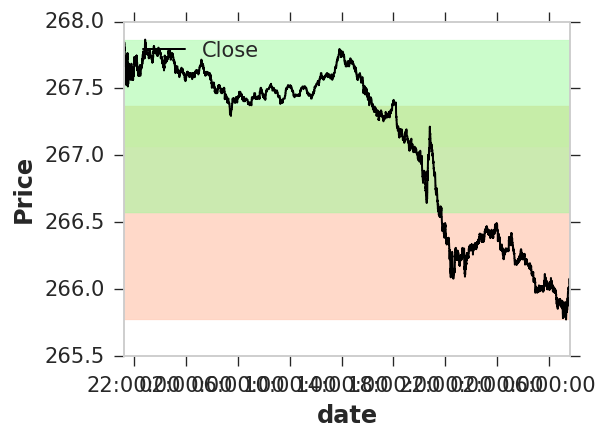

In [36]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(data.Close,color='black')
ax.axhspan(level1,price_min,alpha=0.4,color='lightsalmon')
ax.axhspan(level2,level1,alpha=0.5,color='palegoldenrod')
ax.axhspan(level3,level3,alpha=0.5,color='palegreen')
ax.axhspan(price_max,level3,alpha=0.5,color='palegreen')

plt.ylabel("Price")
plt.xlabel("date")
plt.legend(loc=2)
plt.show()